---

## **Driving the Future of Vehicle Pricing: A Machine Learning Approach**

### **Part 2 - Exploratory Data Analysis**

**By: Ali Sehpar Shikoh**

---

## **Introduction**

Exploratory Data Analysis (EDA) is the second part of the vehicle price prediction project and it is crucial in understanding the underlying patterns and relationships in the data. This phase of the project involves analyzing and summarizing the data using various statistical and visual techniques to gain insights into the data.

The goal of EDA is to gain a deeper understanding of the data, identify any trends, patterns, outliers, and anomalies that may impact the accuracy of the predictions, and help to formulate hypotheses about the relationships between the variables. This information can then be used to refine the data cleaning steps and feature engineering, and to select the appropriate modeling techniques.

---

## **Importing Libraries and Data**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set() # setting seaborn default for plots

# removing scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x) 

In [7]:
# importing the dataset
cars_df = pd.read_csv('Data\cleaned_dataset_1.csv', index_col='vin')

# checking the shape of the dataset
cars_df.shape

C:\Users\raish\AppData\Local\Temp\ipykernel_6920\2023101433.py:2: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  cars_df = pd.read_csv('Data\cleaned_dataset_1.csv', index_col='vin')


(2625910, 24)

## **Descriptive Statistics**

In the first part of the project, we performed some descriptive statistics on the data to help us understand the distribution of the data and to identify any outliers. In this section, we will go over the results of the descriptive statistics and discuss the findings in more detail.

In [8]:
# descriptive statistics of the dataset
cars_df.describe()

,daysonmarket,horsepower,maximum_seating,mileage,price,savings_amount,torque,year,combined_fuel_economy,legroom,major_options_count,size_of_vehicle
count,2625910.000,2625910.000,2625910.000,2625910.000,2625910.000,2625910.000,2625910.000,2625910.000,2625910.000,2625910.000,2625910.000,2625910.000
mean,75.514,243.627,5.438,20835.650,10.221,554.623,264.273,2018.348,26.315,80.244,6.326,470.320
std,104.468,90.510,1.141,28501.016,0.510,1104.509,107.955,3.234,7.626,3.323,3.466,48.732
min,0.000,63.000,2.000,0.000,5.545,0.000,68.000,1915.000,9.500,0.000,1.000,310.200
25%,15.000,170.000,5.000,5.000,9.900,0.000,181.000,2017.000,22.500,78.200,4.000,440.200
50%,36.000,228.000,5.000,1099.000,10.222,0.000,264.273,2020.000,26.083,80.166,6.000,456.500
75%,82.000,300.000,6.000,35246.000,10.573,786.000,275.000,2020.000,28.500,81.700,8.000,485.400
max,3573.000,1001.000,15.000,109146.000,15.009,147414.000,944.000,2021.000,127.000,104.964,59.000,702.000


These results tell us that the average vehicle on CarGurus has been on the market for 75 days, has a horsepower of 243, a maximum seating capacity of 5, a mileage of 20,835 miles, a price of $10,221, a savings amount of $554, a torque of 264, and was manufactured in 2018. The average vehicle has a combined fuel economy of 26.3 miles per gallon, a legroom of 80.2 inches, a major options count of 6.3, and a size of 470.3 cubic feet.

This table is a little difficult to read, and only accounts for the numerical columns. So, let's visualize the data instead.

We will start by looking at the categorical columns.

In [9]:
cars_df2 = cars_df
# checking how many categorical columns are in the dataframe
cars_df2.select_dtypes(include='object').nunique()

body_type          9
engine_type       18
exterior_color    14
fuel_type          8
interior_color    16
make_name         21
model_name        21
seller_rating      5
transmission       4
wheel_system       5
dealer_region      4
dtype: int64

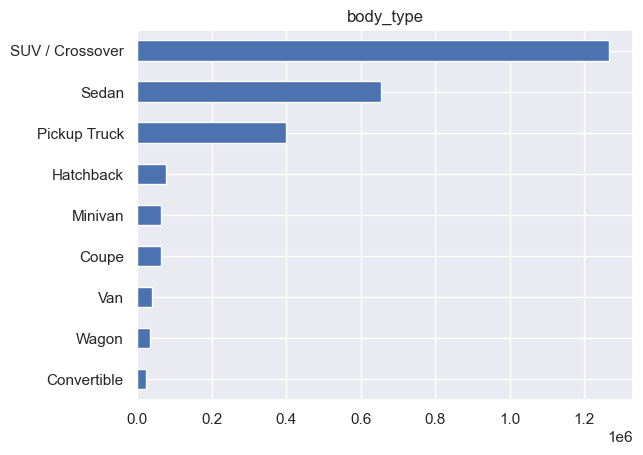

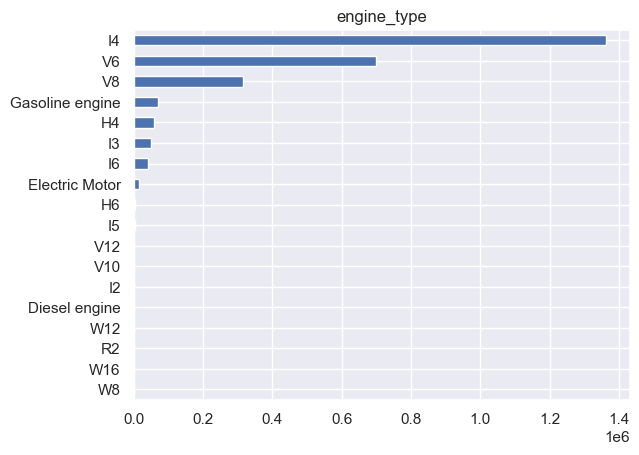

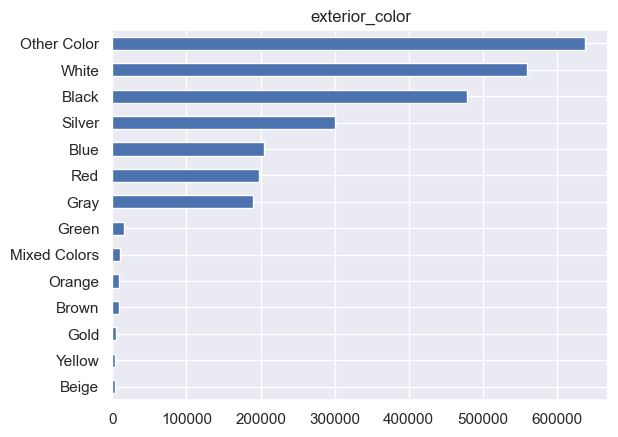

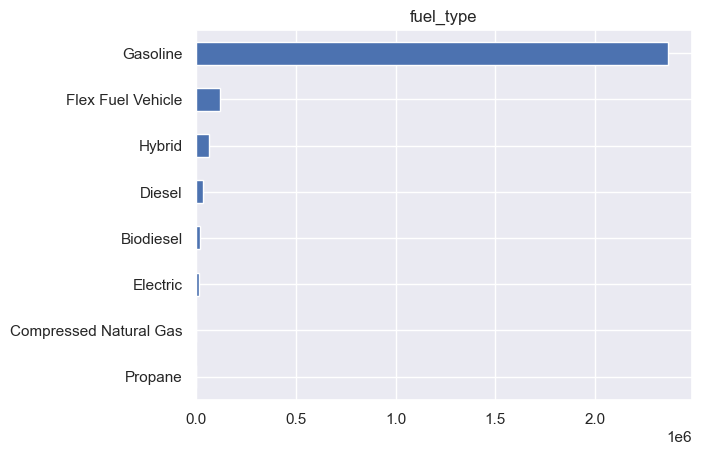

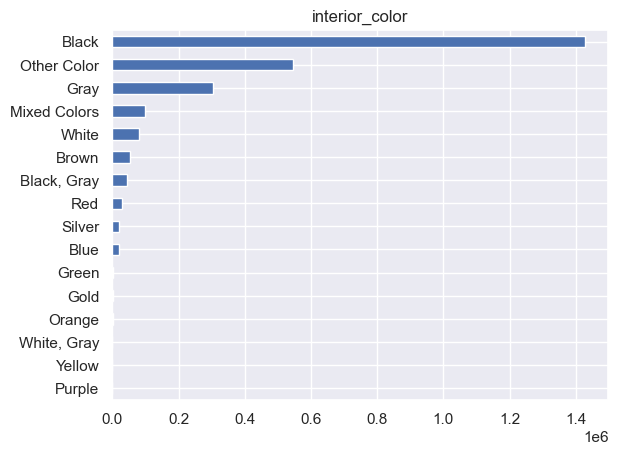

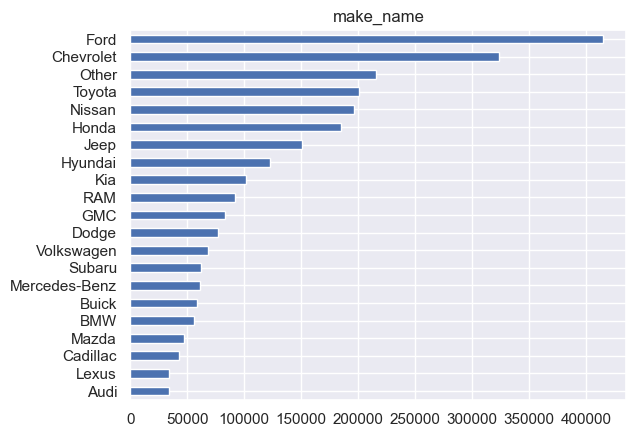

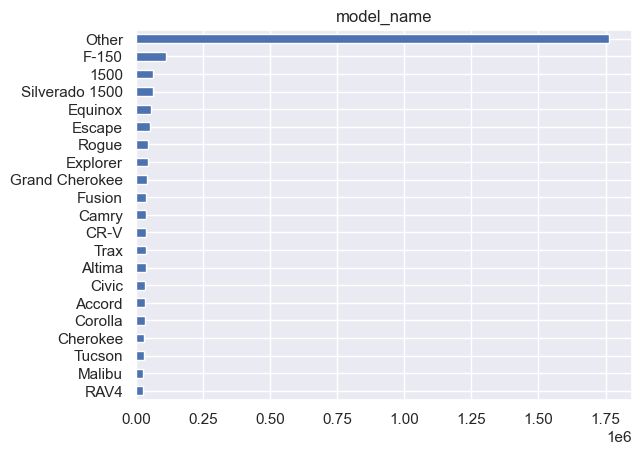

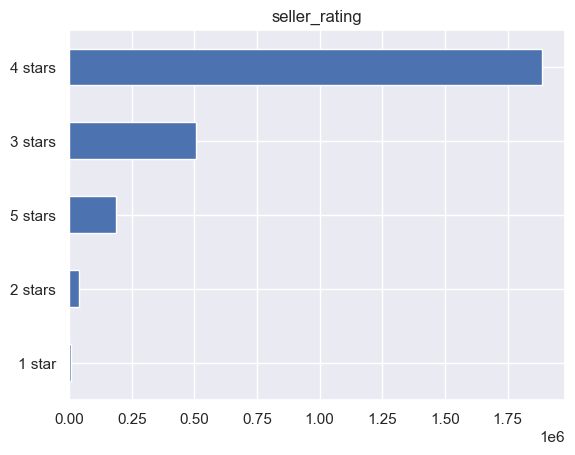

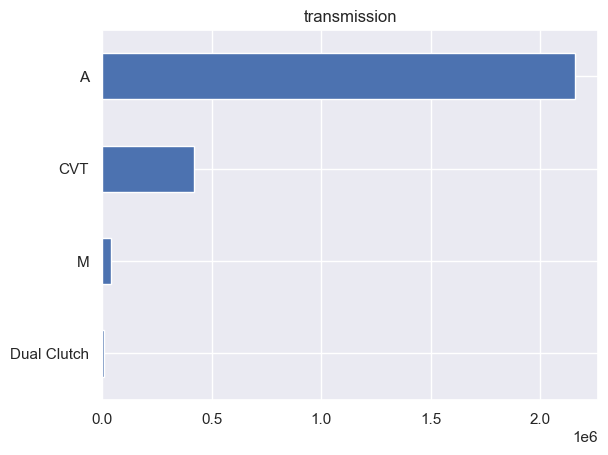

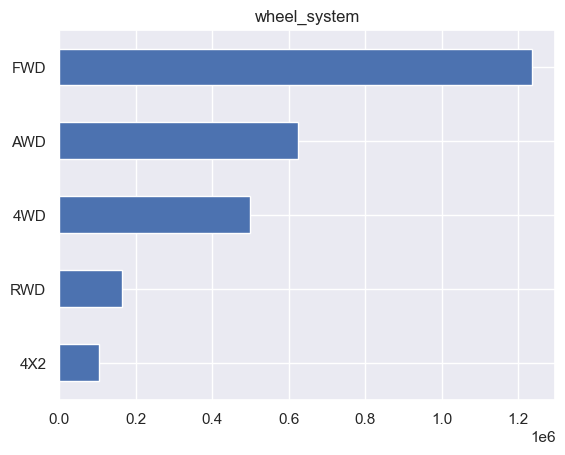

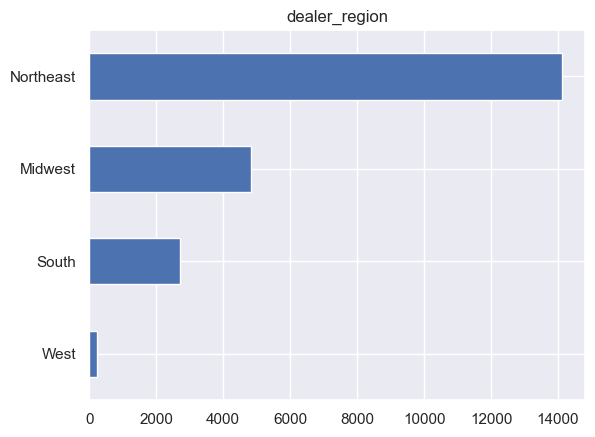

In [10]:
# Pull out the categorical variables
categorical_df = cars_df2.select_dtypes('object')

# Iterate column by column
for column in categorical_df:
    
    # Do Something
    categorical_df[column].value_counts().sort_values().plot(kind='barh')
    plt.title(column)
    plt.show()

**Observations:**

1. The top 3 body types are SUV / Crossover, Sedan, and Pickup Truck.
2. The top 3 engine types are I4, V6, and V8.
3. Top 3 exterior colors are White, Black, and Silver.
4. Top 3 fuel types are Gasoline, Flex Fuel, and Hybrid.
5. Top 3 interior colors are Black, Gray, and White.
6. Top 3 makes are Ford, Chevrolet, and Toyota.
7. Top 3 models are F-150, Silverado 1500, and F-250.
8. Most seller ratings are between 3 and 4.
9. Most common wheel systems are FWD and AWD.
10. Most vehicles are located in the Northeast region.
11. Most common transmission types are Automatic and CVT.

Though we already looked at the numerical columns, lets plot them to get a better understanding of the distribution of the data and see if we missed anything.

In [11]:
# checking how many numerical columns are in the dataframe
cars_df2.select_dtypes(exclude='object').nunique()

daysonmarket               1571
has_incidents                 2
horsepower                  448
maximum_seating              11
mileage                  108997
price                     85492
savings_amount            10697
torque                      409
year                         96
combined_fuel_economy       166
legroom                     336
major_options_count          54
size_of_vehicle            5786
dtype: int64

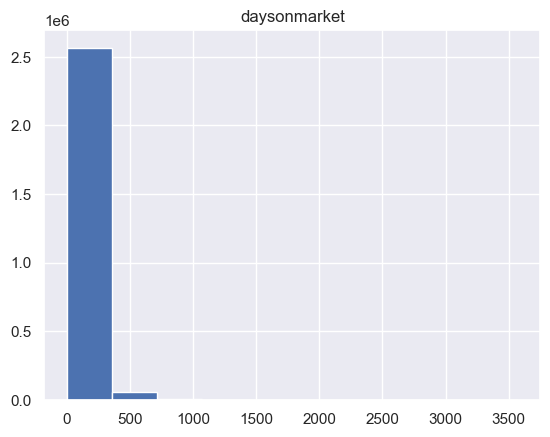

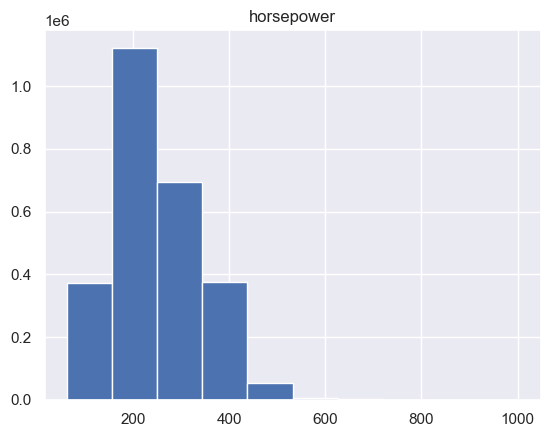

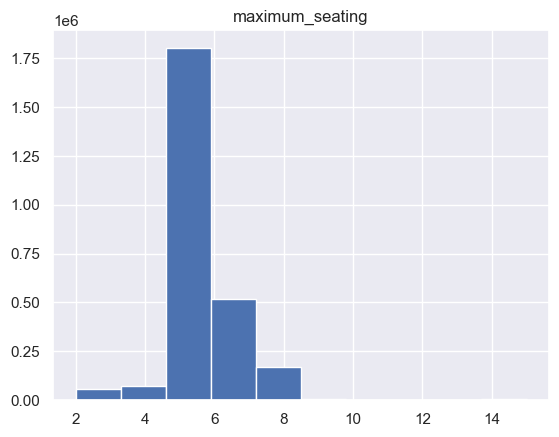

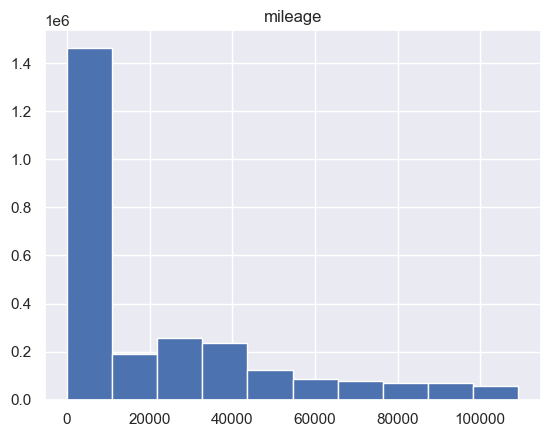

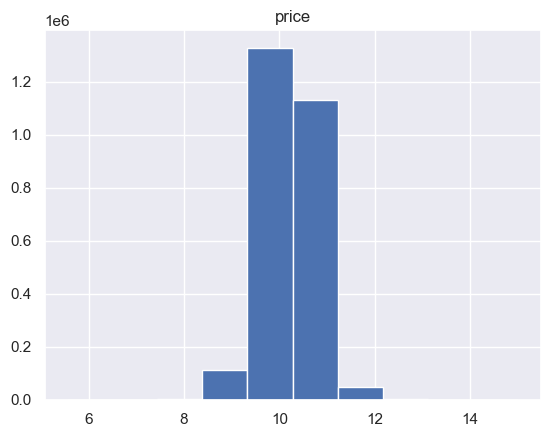

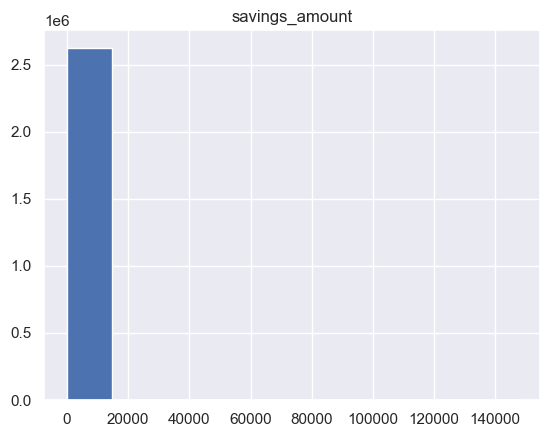

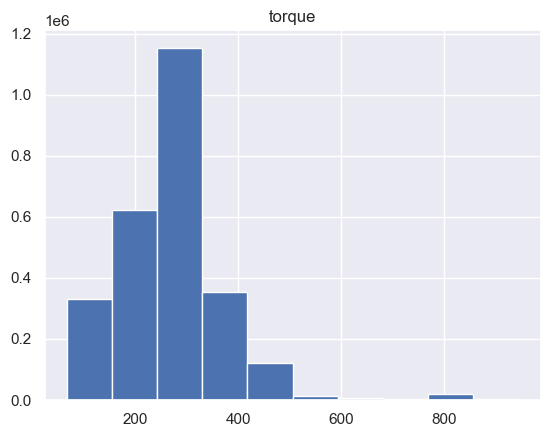

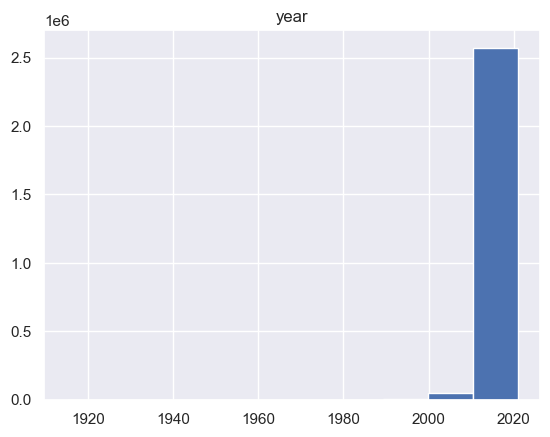

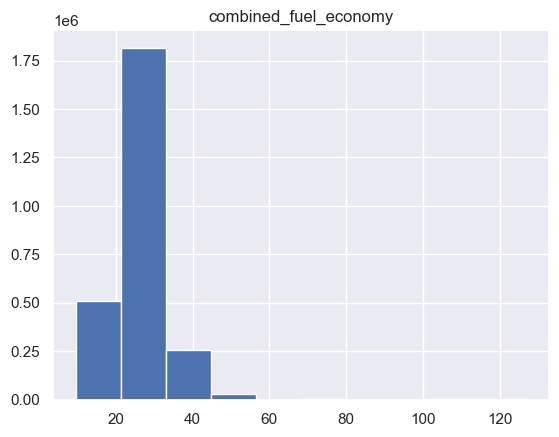

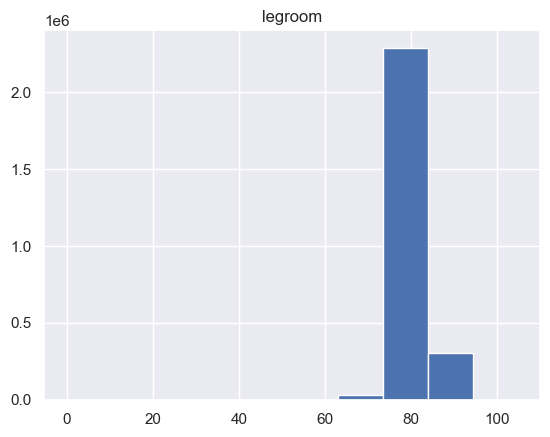

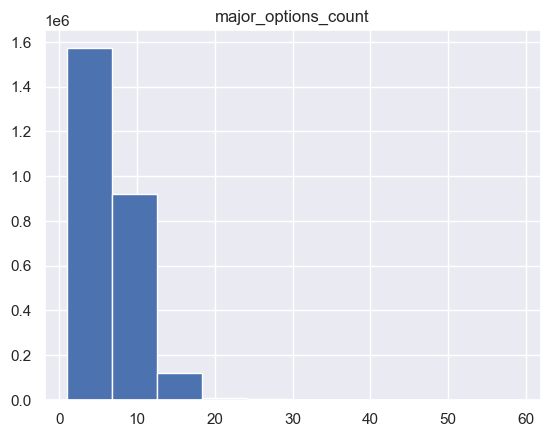

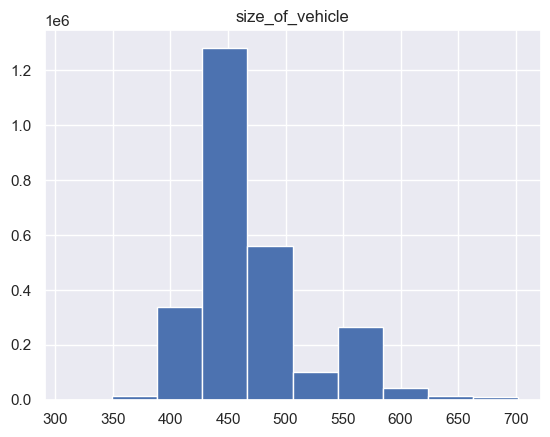

In [12]:
# Pull out the categorical variables
numerical_df = cars_df2.select_dtypes(['float', 'int64'])

# Iterate column by column
for column in numerical_df:
    
    # Do Something
    numerical_df[column].hist()
    plt.title(column)
    plt.show()

**Observations:**

1. The average listing duration is 75 days.
2. The average speed is 243 horsepower.
3. The average vehicle has 5 seats.
4. The average vehicle has 4 doors.
5. Most vehicles being sold are relatively new, with an average mileage of 20,835 miles.
6. The average price of a vehicle is $29933.37.
7. The average savings is $554.62.
8. The average torque is 260 ft-lbs.
9. The average vehicle is 4 years old, in this dataset.
10. The average fuel economy is 26.3 miles per gallon.
11. The average leg room is 80.5 inches.
12. The average wheelbase is 121.5 inches.
13. The average major options are 6 options.
14. The average size of a vehicle is 439.5 inches.
 
---

## **Correlation Analysis**

Let's take a look at the correlation between the features. We will start by looking at the correlation between the numerical features.

C:\Users\raish\AppData\Local\Temp\ipykernel_6920\1092935339.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = cars_df2.corr()


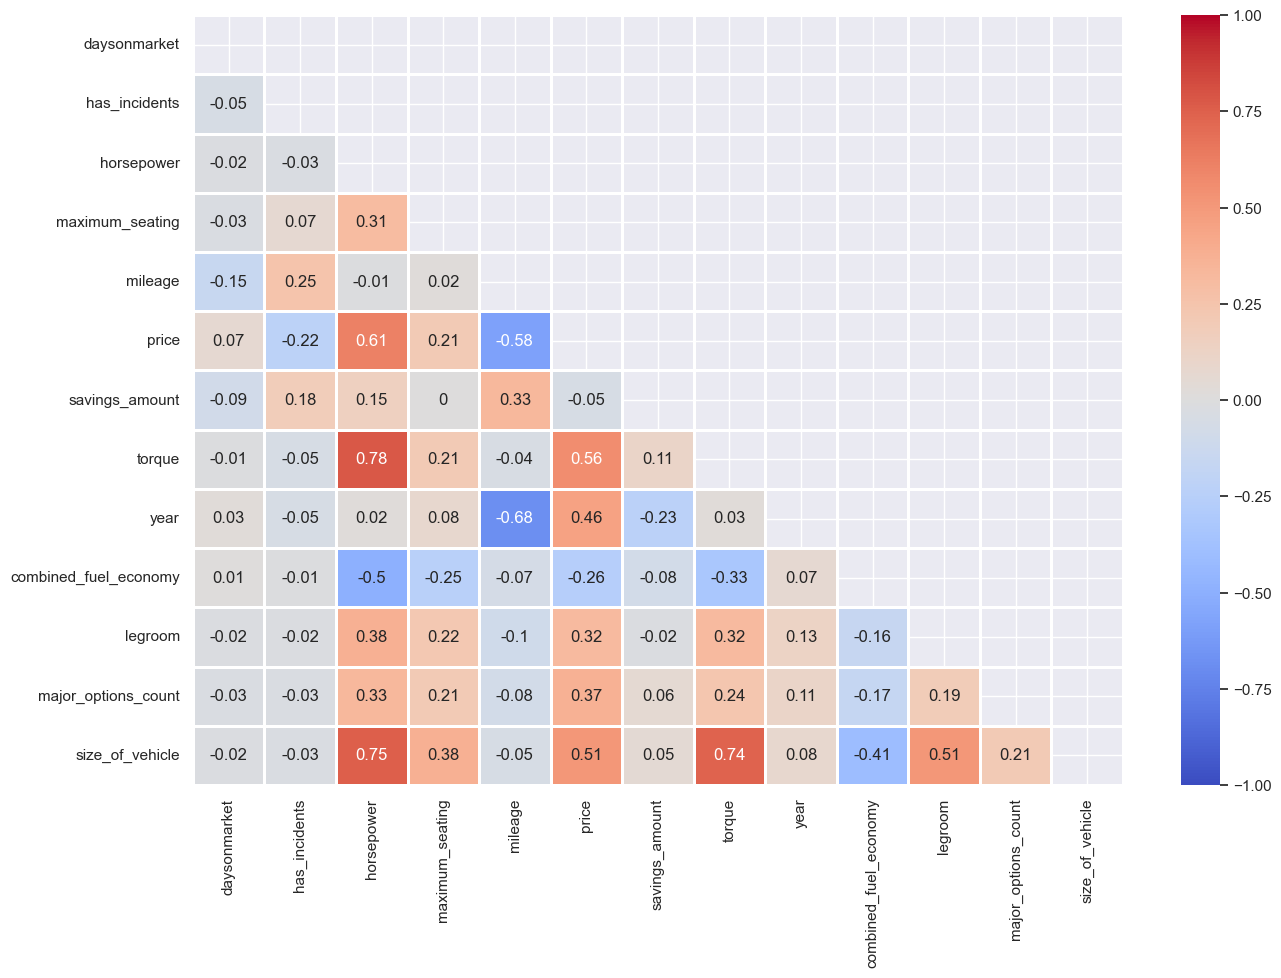

In [13]:
# instantiating the correlation matrix
corr_df = cars_df2.corr()

# Create a mask to only show the lower triangle of the correlation matrix
mask = np.triu(corr_df)

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))
sns.heatmap(corr_df.round(2), annot=True, vmax=1, vmin=-1, 
            center=0, cmap="coolwarm", mask=mask, linewidths=1)
plt.show()

There is no multicollinearity between the numerical columns. This means that we can use all of the numerical columns in our model.

---

## **Encoding Categorical Columns**

Now before we look at the correlation between the categorical columns, we need to encode them. We will use the `get_dummies()` function to encode the categorical columns.

In [14]:
cat_col = cars_df2.select_dtypes(include='object').columns

cat_col

Index(['body_type', 'engine_type', 'exterior_color', 'fuel_type',
       'interior_color', 'make_name', 'model_name', 'seller_rating',
       'transmission', 'wheel_system', 'dealer_region'],
      dtype='object')

In [15]:
# looping through the categorical columns and using get_dummies to create dummy variables
for col in cat_col:
    dummies = pd.get_dummies(cars_df2[col], prefix=col, drop_first=True)
    cars_df2 = pd.concat([cars_df2, dummies], axis=1)
    cars_df2.drop(col, axis=1, inplace=True)
     
# checking the result
cars_df2.head()

,daysonmarket,has_incidents,horsepower,maximum_seating,mileage,price,savings_amount,torque,year,combined_fuel_economy,...,transmission_CVT,transmission_Dual Clutch,transmission_M,wheel_system_4X2,wheel_system_AWD,wheel_system_FWD,wheel_system_RWD,dealer_region_Northeast,dealer_region_South,dealer_region_West
vin,,,,,,,,,,,,,,,,,,,,,
ZACNJABB5KPJ92081,522,False,177.000,5,7.000,10.049,0,200.000,2019,26.083,...,0,0,0,0,0,1,0,0,0,0
SALCJ2FX1LH858117,207,False,246.000,7,8.000,10.747,0,269.000,2020,26.083,...,0,0,0,0,1,0,0,0,0,0
SALRR2RV0L2433391,196,False,340.000,7,11.000,11.119,0,332.000,2020,26.083,...,0,0,0,0,1,0,0,0,0,0
SALCJ2FXXLH862327,137,False,246.000,7,7.000,10.797,0,269.000,2020,26.083,...,0,0,0,0,1,0,0,0,0,0
SALYK2EX1LA261711,242,False,247.000,5,12.000,11.111,0,269.000,2020,26.083,...,0,0,0,0,1,0,0,0,0,0


It looks like we have drastically increased the number of columns in our dataset.

Lets take a look at the correlation between the features and the target variable.

In [18]:
# checking the correlation between the price and the other variables
matrix = pd.DataFrame(cars_df2.corr()['price'].sort_values(ascending=False)).style.background_gradient(cmap='coolwarm')
matrix

,price
price,1.000000
horsepower,0.611184
torque,0.560698
size_of_vehicle,0.508744
year,0.456368
major_options_count,0.366454
body_type_Pickup Truck,0.332278
engine_type_V8,0.321653
legroom,0.317011
maximum_seating,0.205582


Observations: 

* The price of a vehicle is positively correlated with horsepower, torque, and size of vehicle, which suggests that larger and more powerful vehicles tend to be more expensive.

* The body type of a vehicle (Pickup Truck) and engine type (V8) are positively correlated with price, which could indicate that these types of vehicles tend to be more expensive.

* Make and model of a vehicle can also influence the price, with some makes and models being positively correlated with price (e.g. Mercedes-Benz, BMW) while others are negatively correlated (e.g. Chevrolet, Buick).

* The exterior and interior color of a vehicle can also impact its price, with some colors being positively correlated (e.g. white) while others are negatively correlated (e.g. brown).

* The dealer region can also have an impact on the price of a vehicle, with vehicles sold in certain regions (e.g. Northeast) being more expensive than others (e.g. West).

* The fuel type of a vehicle can also impact its price, with certain fuel types (e.g. diesel) being positively correlated with price while others (e.g. hybrid) are negatively correlated.

* The number of days a vehicle has been on the market (daysonmarket) can also impact its price, with vehicles that have been on the market for longer periods of time being cheaper.

---

## **Feature Selection**

In order to make our model more accurate, we will drop the features that are not important to predicting the price of a vehicle. We will use the correlation coefficients to determine which features are important.

Lets set our correlation threshold to 0.05 and -0.05. Meaning that we will only keep the features that have a correlation of 0.05 or higher, or -0.05 or lower. This will help us reduce the number of features in our dataset. 

The benefit of reducing the number of features is that it will make our model more accurate and easier to train. We will also be able to train our model faster. This will help us save time and money when training our model on a large dataset.

In [19]:
# making a list of the columns that have a correlation between 0.05 and -0.05 with the price column
columns_to_drop = []

for col in cars_df2.columns:
    if cars_df2[col].corr(cars_df2['price']) < 0.05 and cars_df2[col].corr(cars_df2['price']) > -0.05:
       columns_to_drop.append(col)
         
# checking the list
columns_to_drop

['body_type_Coupe',
 'body_type_Minivan',
 'body_type_Van',
 'engine_type_Electric Motor',
 'engine_type_H4',
 'engine_type_I2',
 'engine_type_I3',
 'engine_type_R2',
 'engine_type_V10',
 'engine_type_W12',
 'engine_type_W16',
 'engine_type_W8',
 'exterior_color_Black',
 'exterior_color_Blue',
 'exterior_color_Brown',
 'exterior_color_Gold',
 'exterior_color_Gray',
 'exterior_color_Green',
 'exterior_color_Mixed Colors',
 'exterior_color_Orange',
 'exterior_color_Other Color',
 'exterior_color_Red',
 'exterior_color_Yellow',
 'fuel_type_Compressed Natural Gas',
 'fuel_type_Electric',
 'fuel_type_Flex Fuel Vehicle',
 'fuel_type_Hybrid',
 'fuel_type_Propane',
 'interior_color_Black, Gray',
 'interior_color_Blue',
 'interior_color_Brown',
 'interior_color_Gold',
 'interior_color_Gray',
 'interior_color_Green',
 'interior_color_Mixed Colors',
 'interior_color_Orange',
 'interior_color_Purple',
 'interior_color_Silver',
 'interior_color_White, Gray',
 'interior_color_Yellow',
 'make_name_Bu

Now lots drop the irrelevant features.

In [20]:
# dropping the columns
cars_df2.drop(columns_to_drop, axis=1, inplace=True)

# checking the result
cars_df2.shape

(2625910, 68)

Lets take a look at the new correlation matrix.

In [21]:
# checking the correlation between the price and the other variables
pd.DataFrame(cars_df2.corr()['price'].sort_values(ascending=False)).style.background_gradient(cmap='coolwarm')

,price
price,1.000000
horsepower,0.611184
torque,0.560698
size_of_vehicle,0.508744
year,0.456368
major_options_count,0.366454
body_type_Pickup Truck,0.332278
engine_type_V8,0.321653
legroom,0.317011
maximum_seating,0.205582


This looks much better. We have reduced the number of features. This will help us train our model faster and more accurately.

---

## **Multicollinearity**

Next, lets check for multicollinearity. This will help us determine if there are any features that are highly correlated with each other which will cause our model to be biased.

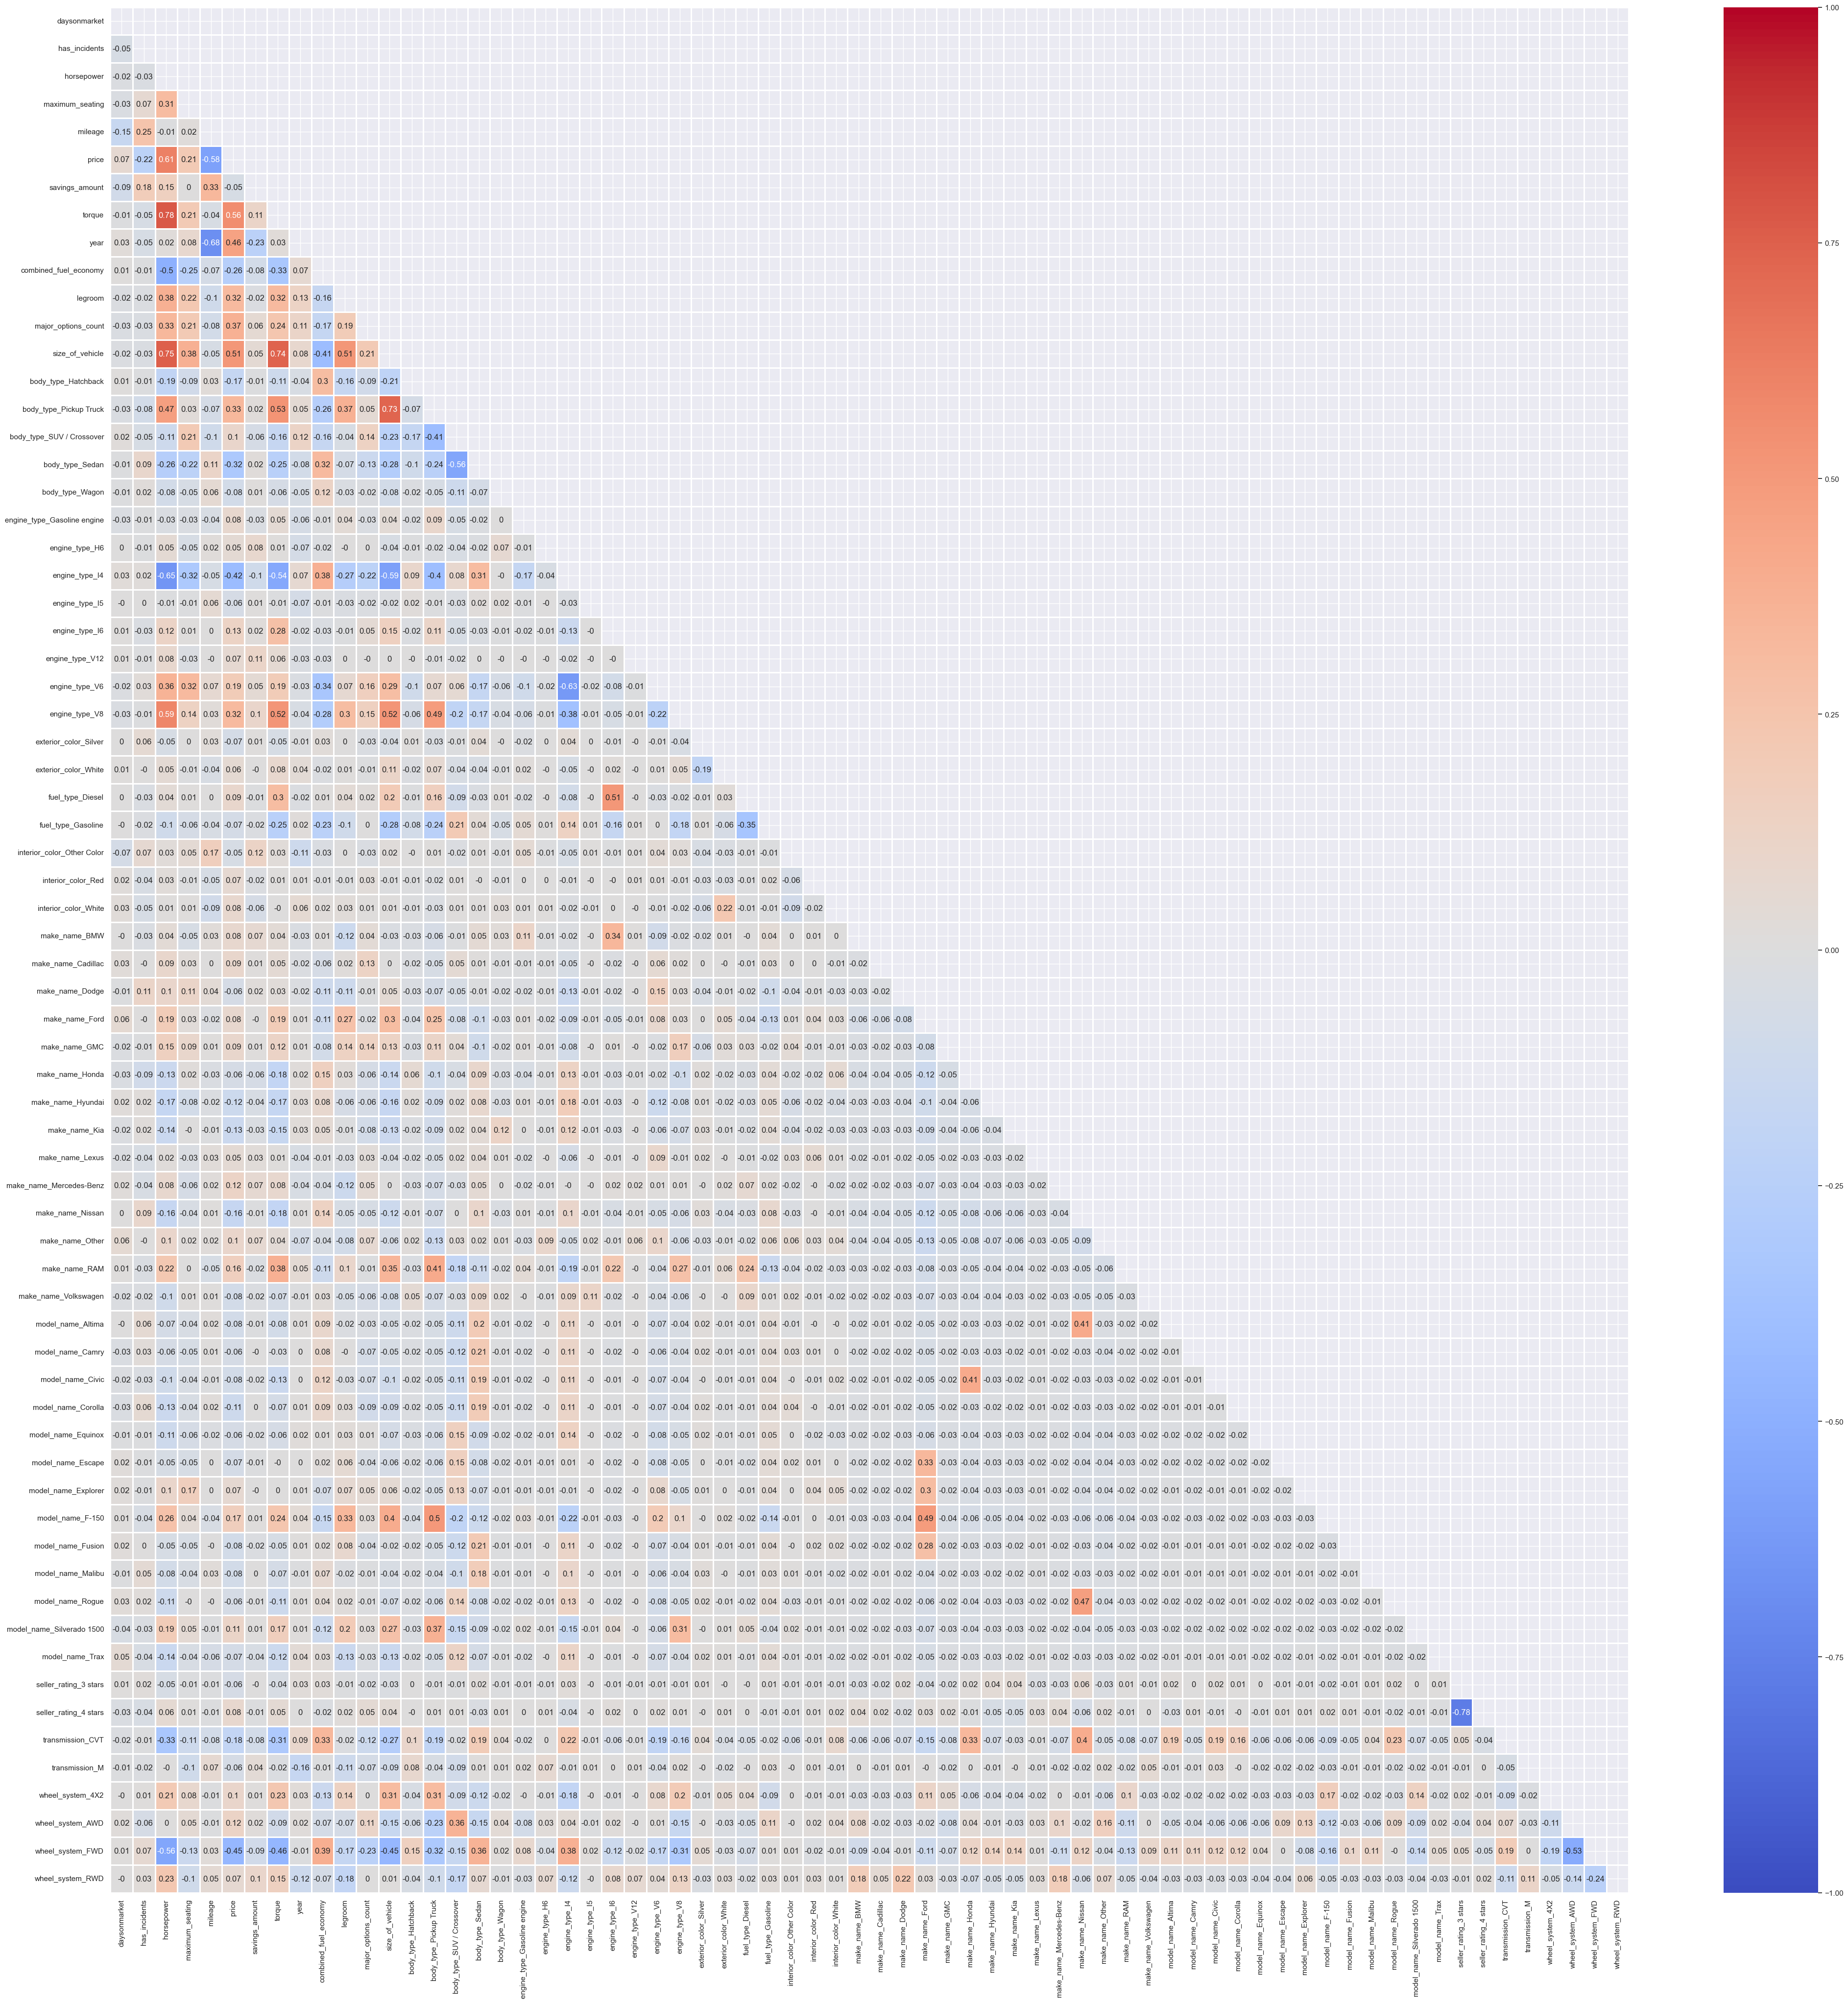

In [22]:
# instantiating the correlation matrix
corr_df = cars_df2.corr()

# Create a mask to only show the lower triangle of the correlation matrix
mask = np.triu(corr_df)

# Set up the matplotlib figure
plt.figure(figsize=(50, 50))
sns.heatmap(corr_df.round(2), annot=True, vmax=1, vmin=-1,
            center=0, cmap="coolwarm", mask=mask, linewidths=1)
plt.show()

We can see that there are no features that are highly correlated with each other. This means that we do not have to worry about multicollinearity.

We will now save the new dataset and begin training our model on the next notebook.

In [23]:
# Exporting the dataframe to a csv file
cars_df2.to_csv("Data\cars_cleaned.csv")

---

## **Summary**

The exploratory data analysis was performed on a dataset that contained various features of used cars for sale, such as make and model, year, body type, engine type, and many others. The purpose of the analysis was to understand the relationships between different variables in the dataset and to identify any patterns or anomalies in the data.

The first step in the EDA, univariate and bivariate analysis was performed on the data to understand the distribution and relationships between the different variables. The analysis revealed that the most important factors that affect the price of a used car are the year, horsepower, and torque of the vehicle. Other factors such as body type, engine type, and size of the vehicle also play a role in determining the price of a car.

Additionally, the EDA showed that the prices of used cars vary greatly depending on the make and model, with some models commanding significantly higher prices than others. The color of the car's exterior and interior also play a role in determining its price, although this effect is not as pronounced as that of the make and model.

In conclusion, the EDA provided valuable insights into the relationships between different variables in the used car dataset and helped identify the factors that are most important in determining the price of a used car.

---

## **Actionable Insights**

Here are some actionable insights based on what we learned from the EDA:

`Market Demand`: The popularity of SUV/Crossover, sedans, and pickup trucks highlights the consumer demand for these types of vehicles. Understanding consumer preferences is important for effective pricing and marketing strategies.

`Brand Awareness`: The dominance of Ford, Chevrolet, and Toyota in the market suggests that these brands have a strong reputation and brand awareness among consumers. Utilizing these insights can inform advertising and marketing efforts to increase brand recognition.

`Fuel Economy`: The average fuel economy of 19 mpg in the city and 20-30 mpg on the highway reveals the importance of fuel efficiency to consumers. Emphasizing fuel efficiency in marketing materials can appeal to consumers who are conscious of their fuel expenses.

`Engine Type`: The prevalence of I4 engines and V6 and V8 engines highlights the consumer demand for these types of engines. Understanding consumer preferences for engine type can inform vehicle design and production decisions.

`Exterior and Interior Colors`: The dominance of white, black, and silver for exterior colors and black, gray, and white for interior colors suggests that these colors are popular and in demand among consumers. Offering a wide range of color options can appeal to a wider consumer base.

`Accident History`: The high percentage of vehicles that have been in an accident, damaged, salvaged, or stolen highlights the importance of conducting thorough background checks and reporting the vehicle's history to potential buyers.

`Fuel Type`: The dominance of gas-powered vehicles and the average fuel tank size of 26 gal. reveals consumer preferences for traditional fuel types and can inform production decisions.

`Horsepower and Torque`: The average horsepower and torque of vehicles highlights consumer demand for vehicles with a certain level of performance and power. Understanding these preferences can inform vehicle design and production decisions.

`Options and Seating Capacity`: The average number of major options and the most common seating capacity of 5 seats highlights consumer preferences for vehicles with certain amenities and capabilities. Offering a variety of options can appeal to a wider consumer base.

`Vehicle Age and Price`: The average age of 2 years and the average price of $29933.37 highlights consumer demand for relatively new vehicles at a certain price point. Understanding these preferences can inform pricing and production decisions.

`Transmission Type`: The dominance of automatic transmissions highlights consumer preferences for this type of transmission. Understanding these preferences can inform production decisions and pricing strategies.

`Wheel Systems`: The popularity of FWD, AWD, and 4WD wheel systems highlights consumer preferences for specific types of wheel systems. Understanding these preferences can inform production decisions and pricing strategies.

